## PyCBC: Python Software for Astrophysical Analysis of Gravitational Waves from Compact Object Coalescence##
 * Learn more about [PyCBC](https://ligo-cbc.github.io/)
 * Find more examples on our [documentation pages](https://github.com/ligo-cbc/pycbc)


## Investigations of Gravitational waves from the first binary black hole merger detected: GW150914 ##

### See the signal in the data ###

In [53]:
%matplotlib inline
from pycbc.frame import read_frame
from pycbc.filter import highpass_fir, lowpass_fir
from pycbc.psd import welch, interpolate
import pylab

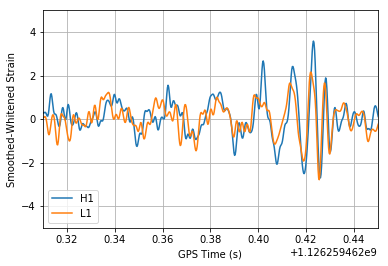

In [54]:
for ifo in ['H1', 'L1']:
    # Read data: The data is available to the public through losc.ligo.org!
    fname = '%s-%s_LOSC_4_V2-1126259446-32.gwf' % (ifo[0], ifo)
    ts = read_frame(fname, '%s:LOSC-STRAIN' % ifo)
    
    # Remove low frequency content
    ts = highpass_fir(ts, 15, 8)

    # Calculate the noise spectrum and use it to whiten the data
    psd = interpolate(welch(ts), 1.0 / ts.duration)
    white_strain = (ts.to_frequencyseries() / psd ** 0.5 * psd.delta_f).to_timeseries()

    # remove frequencies below and above where the main portion of the signal lies
    smooth = highpass_fir(white_strain, 35, 8)
    smooth = lowpass_fir(smooth, 300, 8)

    # time shift and flip L1 to match the time of arrival and phase of Hanford
    if ifo == 'L1':
        smooth *= -1
        smooth.roll(int(.007 / smooth.delta_t))

    pylab.plot(smooth.sample_times.numpy(), smooth.numpy(), label=ifo)

# Plot the region around the signal (time is in gps seconds)
pylab.legend()
pylab.xlim(1126259462.31, 1126259462.45)
pylab.ylabel('Smoothed-Whitened Strain')
pylab.grid()
pylab.ylim(-5, 5)
pylab.xlabel('GPS Time (s)')
pylab.show()